### Random Sample Impuataion
Aim: Random sample imputation consists of taking random observation from the dataset and we use this obseravtion to replace the nan values.
#### When should it used?
It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])

In [3]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [4]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [5]:
df.age.dropna().sample(df.age.isnull().sum(), random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [6]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_random"] = df[variable]
    
    ## it wil have the random sample to fill the na4
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    ##pandas needs to have same index to merge the datset
#     random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [7]:
median_age = df.age.median()
median_fare = df.fare.median()

In [8]:
impute_nan(df, 'age', median_age)
impute_nan(df, 'fare', median_fare)

In [9]:
df.head()

,age,fare,survived,age_median,age_random,fare_median,fare_random
0,NaN,7.7333,1,28.0,NaN,7.7333,7.7333
1,38.0,8.6625,0,38.0,38.0,8.6625,8.6625
2,30.0,24.1500,0,30.0,30.0,24.1500,24.1500
3,54.0,23.0000,1,54.0,54.0,23.0000,23.0000
4,40.0,13.0000,0,40.0,40.0,13.0000,13.0000


In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

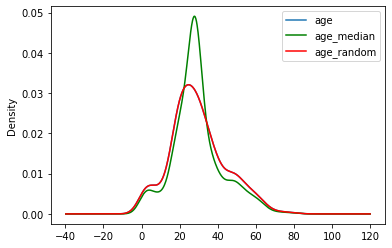

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='green')
df.age_random.plot(kind='kde', ax=ax, color='red')
ax.legend()

## Advantages and Disadvantages

### Advantages:
1. It easy to implement
2. There is less distortion in variance

### Disadvantes:
1. Every situation randomness wo't work

## 3. Capturing NaN values with a new features
It works well if the data are not missing completely at random

In [12]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [13]:
import numpy as np

In [14]:
df.age.mean()

29.519847189349115

In [15]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [16]:
df.age.fillna(df.age.median(), inplace=True)

## Advantages
1. Easy to implement
2. Caputes the importance of missing values

## Disadvantages
1. Creating Additional Features(Curse of Dimensonality)

## 4. End of Distribution imputation


In [17]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])

In [18]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

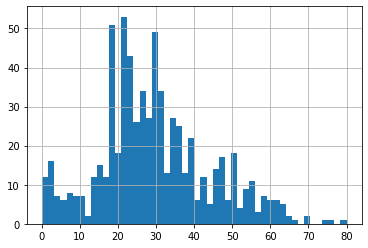

In [20]:
df.age.hist(bins=50)

In [27]:
extreme = df.age.mean() + 3 * df.age.std()

In [23]:
import seaborn as sns

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

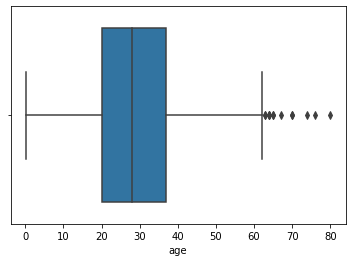

In [25]:
sns.boxplot('age', data=df)

In [26]:
def impute_nan(df, variable, median, extreme):
    df[variable + "_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [29]:
impute_nan(df, 'age', df.age.median(), extreme)

In [30]:
df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


<AxesSubplot:>

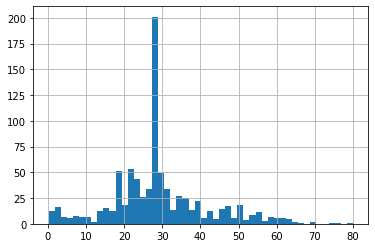

In [31]:
df.age.hist(bins=50)

<AxesSubplot:>

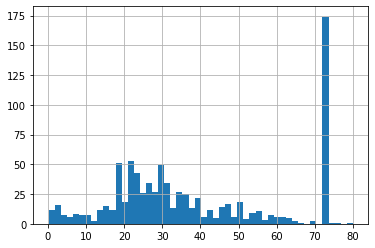

In [32]:
df.age_end_distribution.hist(bins=50)

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_distribution'>

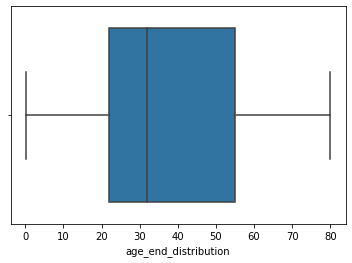

In [33]:
sns.boxplot('age_end_distribution', data=df)

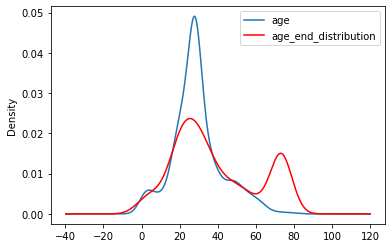

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
# df.age_median.plot(kind='kde', ax=ax, color='green')
df.age_end_distribution.plot(kind='kde', ax=ax, color='red')
ax.legend()

In [34]:
df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


## Advantages:
1. Easy to implement
2. Captures the importance of missingness if there is one

## Disadvantages:
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distoring its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering